### Determining optimal number of clusters and clustering in python

In [ ]:
# Import all libraries and packages
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.random import seed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
import warnings
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#### Clustering with the four PCs

In [2]:
# bring in PCA version of the dataset to cluster
last = pd.read_csv("pca_last.csv")

In [4]:
# elbow method to choose number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(last)
    sse.append(kmeans.inertia_)

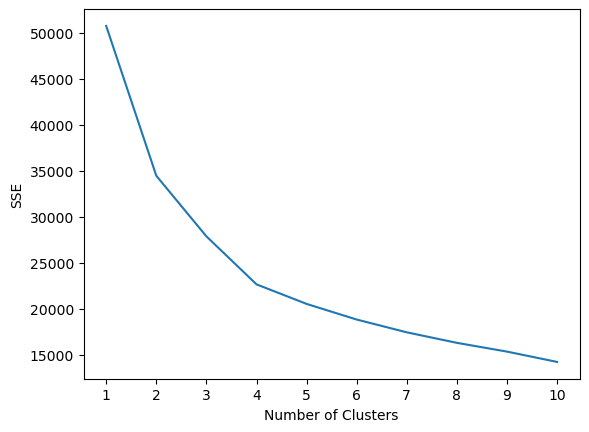

In [28]:
# look where the elbow is
plt.style.use("default")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [24]:
# compute the silhouette coefficients for the clusters to assess
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(last)
    score = silhouette_score(last, kmeans.labels_)
    silhouette_coefficients.append(score)

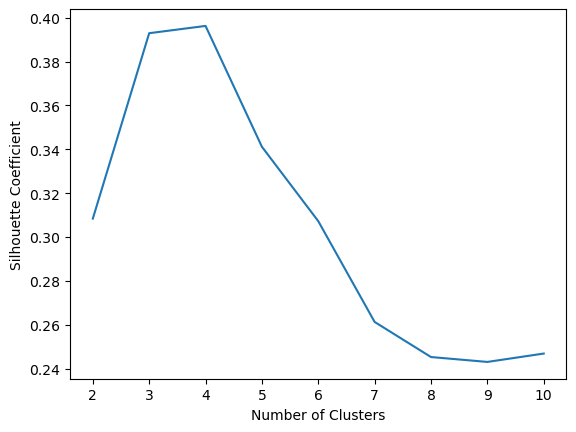

In [29]:
plt.style.use("default")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [6]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

Optimal clusters is 4.

In [7]:
# set up the kmeans you want
import random

kmeans = KMeans(init='k-means++', n_clusters=4, n_init=25, max_iter=100, random_state=42)

In [8]:
# fit the algorithm to your data
y_kmeans = kmeans.fit(last)

In [9]:
label = y_kmeans.predict(last)

In [10]:
# calculate silhouette score for 4 clusters
score = silhouette_score(last, kmeans.labels_, metric='euclidean')

In [11]:
score

0.29972136125880755

In [ ]:
# calculate chs score
chs = calinski_harabasz_score(last, kmeans.labels_)
chs

In [12]:
# append labels 
last['Cluster'] = pd.Series(label, index=last.index)

In [17]:
# append labels as new column to freqs too as this has the original data
freqs['Cluster'] = pd.Series(label, index=last.index)

In [18]:
freqs.head()

,IndividualID,...1,HouseholdID.x,PrivCar2_B01ID,OrdBus2Freq_B01ID,Coach2Freq_B01ID,Train2Freq_B01ID,TaxiCab2Freq_B01ID,Bicycle3Freq_B01ID,Walk2Freq_B01ID,SurveyYear,HouseholdID.y,VehAge_B01ID,VehCO2Tax2008_B01ID,VehAnMileage_B01ID,VehWeekMileage_B01ID,VehComMile_B01ID,Cluster
0,2019000003,332559,2019000001,2,9,10,6,8,8,6,2019,0,0,0,0,0,0,1
1,2019000007,332563,2019000002,3,1,10,10,4,6,10,2019,0,0,0,0,0,0,2
2,2019000008,332564,2019000002,1,4,10,10,6,6,10,2019,0,0,0,0,0,0,1
3,2019000015,332571,2019000006,1,1,10,10,10,6,10,2019,0,0,0,0,0,0,1
4,2019000017,332573,2019000007,1,8,10,8,10,8,4,2019,2019000007,12,7,9,5,3,0


In [150]:
# extract cluster info
zero = freqs[freqs['Cluster'] == 0]
one = freqs[freqs['Cluster'] == 1]
two = freqs[freqs['Cluster'] == 2]
three = freqs[freqs['Cluster'] == 3]

In [151]:
# check mean frequencies of mode per cluster
p = zero.describe()
t = one.describe()
q = two.describe()
c = three.describe()

#### Clustering with just the standardised version of the data (non-PCA)

In [59]:
std = pd.read_csv("nonpca_freqs.csv")

In [60]:
# check optimal number of clusters hasn't changed using the non-pca version
# elbow method to choose number of clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(std)
    sse.append(kmeans.inertia_)

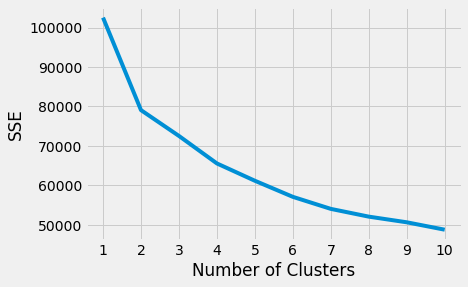

In [61]:
# look where the elbow is
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [62]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

4

Four clusters still optimal.

In [63]:
# fit the algorithm to your data
y_kmeans = kmeans.fit(std)

In [64]:
predict = kmeans.predict(std)

In [65]:
# calculate silhouette score for 5 clusters
score = silhouette_score(std, kmeans.labels_, metric='euclidean')

In [66]:
score

0.17846368676470717

Does not yield better results than the PCA version.

In [ ]:
#### Trailling other algorithms

1. Agglomerative clustering

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward') # Again, 'ward' is specified here to match the linkage in sch.dendrogram.
y_hc = hc.fit_predict(last)

# Cluster 1
np.where(y_hc == 0)

In [ ]:
# calculate scores
score = silhouette_score(last, y_hc, metric='euclidean')
chs = calinski_harabasz_score(last, y_hc)

2. BIRCH

In [ ]:
# define the model
from sklearn.cluster import Birch
model = Birch(threshold=0.01, n_clusters=4)

# fit the model
t = model.fit_predict(last)

# Cluster 1
np.where(t == 0)

In [ ]:
# calculate scores
score = silhouette_score(last, t, metric="euclidean")
chs = calinski_harabasz_score(last, t)

3. DBSCAN

In [ ]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
k = model.fit_predict(last)

In [ ]:
# calculate scores
score = silhouette_score(last, k, metric="euclidean")
chs = calinski_harabasz_score(last, k)

4. MiniBatchKmeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# define the model
model = MiniBatchKMeans(n_clusters=4)

# fit the model
e = model.fit_predict(last)

In [ ]:
# calculate scores
score = silhouette_score(last, e, metric="euclidean")
chs = calinski_harabasz_score(last, e)

5. Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# define the model
model = SpectralClustering(n_clusters=4)

# fit model and predict clusters
b = model.fit_predict(last)

In [ ]:
# calculate score
score = silhouette_score(pca, b, metric="euclidean")

Highest silhouette score of all the trialled algorithms, explore this.

In [ ]:
# append labels 
last['Cluster'] = pd.Series(b, index=pca.index)

# get value counts to see how many people are in each cluster
last['Cluster'].value_counts()

In [ ]:
Unequal spread of individuals (majority in cluster 0) - reject clustering approach.